# Подготовка

Подключение библитек, загрузка данных:

In [1]:
import math
import matplotlib.pyplot as plot
from sklearn import linear_model
import pandas

trainSet = pandas.read_csv('data/train.csv')
print(trainSet.shape)
print(pandas.DataFrame(trainSet).head(10))

(97, 2)
        x        y
0  6.1101  17.5920
1  5.5277   9.1302
2  8.5186  13.6620
3  7.0032  11.8540
4  5.8598   6.8233
5  8.3829  11.8860
6  7.4764   4.3483
7  8.5781  12.0000
8  6.4862   6.5987
9  5.0546   3.8166


Фреймы для X, Y:

In [2]:
data_x = trainSet[['x']]
data_y = trainSet[['y']]
min_x = float(data_x.min())
max_x = float(data_x.max())

Визуализация функции, и тренировочных данных:

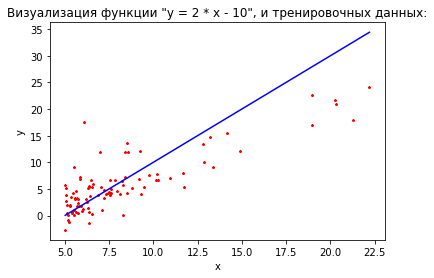

In [3]:
x = pandas.DataFrame([min_x, max_x])
y = 2 * x - 10
# points
plot.scatter(data_x, data_y, s = 5, c = 'red', marker = '*')
# fx
plot.plot(x, y, c = 'blue')
# appereance
plot.xlabel('x')
plot.ylabel('y')
plot.title('Визуализация функции "y = 2 * x - 10", и тренировочных данных:')
# show
plot.show()

linear_model.LinearRegression().fit(data_x, data_y) - обучение с учителем(используем наши данные для этого).
Вычисляем коэффициент детерминации и коэффциент корреляции, чтобы увидеть связь между двумя переменными и степенью, в которой зависимые переменные могут быть предсказаны из независимой(коэффициент детерминации). 
Высокие значения обозначают сильную связь и сильную зависимость.

In [4]:
model = linear_model.LinearRegression().fit(data_x, data_y)

Визуализация функции, и тренировочных данных, а также предсказанных данных:

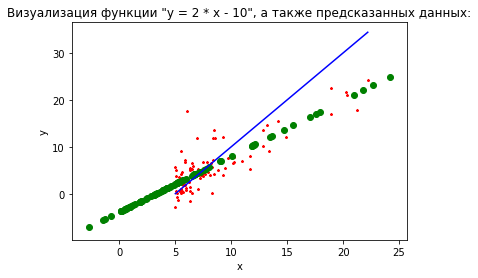

In [5]:
x = pandas.DataFrame([min_x, max_x])
y = 2 * x - 10
# points
plot.scatter(data_x, data_y, s = 5, c = 'red', marker = '*')
# fx
plot.plot(x, y, c = 'blue')
# pred
pred = model.predict(data_y)
plot.scatter(data_y, pred, c = "green")
# appereance
plot.xlabel('x')
plot.ylabel('y')
plot.title('Визуализация функции "y = 2 * x - 10", а также предсказанных данных:')
# show
plot.show()

Как можно увидеть, предсказанные данные довольно близки к тренировочным, а занчит все верно.

# Градиентный спуск

Градиентный спуск — метод численной оптимизации, который может быть использован во многих алгоритмах, где требуется найти экстремум функции — нейронные сети, SVM, k-средних, регрессии.

In [10]:
import numpy

def calcCost(x_cost, y, theta):
    m = len(y)
    predict = x_cost.dot(theta)
    error = (predict - y) ** 2
    return 1.0 / (2 * m) * numpy.sum(error)

def gradientDescent(x_cost, y, theta, alpha, iter_count):
    """
    Возвращает theta и список функций стоимости для каждой итерации
    """
    
    m = len(y)
    l = list()
    
    for i in range(iter_count):
        predictions = x_cost.dot(theta)
        error = numpy.dot(x_cost.transpose(), predictions - y)
        descent = alpha * (1.0 / m) * error
        theta = theta - descent
        l.append(calcCost(x_cost, y, theta))
    
    return theta, l

In [23]:
# берем данные
data_n = trainSet.values
m = data_n[:,0].size
y = data_n[:,1].reshape(m, 1)
theta = numpy.zeros((2,1))
# вычисляем стоимость
x_cost = numpy.append(numpy.ones((m, 1)), data_n[:,0].reshape(m, 1), axis = 1)
# собственно - градиентный спуск
theta, line = gradientDescent(x_cost, y, theta, 0.01, 5000)
# выводим результат
print("h(x) = " + str(theta[0,0]) + " + " + str(theta[1,0]) + " * x")

h(x) = -3.895300510657167 + 1.1929853860482196 * x


Выведем график функции стоимости, при градиентном спуске:

Text(0.5, 1.0, 'График функции стоимости, при градиентном спуске')

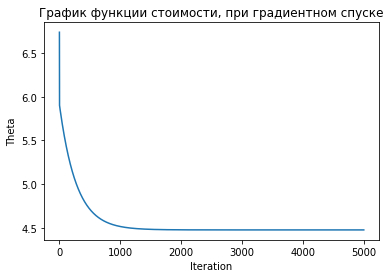

In [24]:
plot.plot(line)
plot.xlabel("Iteration")
plot.ylabel("Theta")
plot.title("График функции стоимости, при градиентном спуске")

Выглядит, как и должен => все верно

# Произведем визуализацю

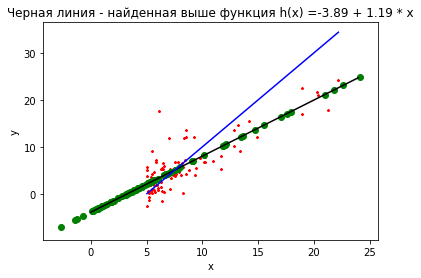

In [27]:
x = pandas.DataFrame([min_x, max_x])
y = 2 * x - 10
# gradientDescent fx
x_value=[x for x in range(25)]
y_value=[x * theta[1] + theta[0] for x in x_value]
plot.plot(x_value, y_value, c = "black")
# points
plot.scatter(data_x, data_y, s = 5, c = 'red', marker = '*')
# fx
plot.plot(x, y, c = 'blue')
# pred
pred = model.predict(data_y)
plot.scatter(data_y, pred, c = "green")
# appereance
plot.xlabel('x')
plot.ylabel('y')
plot.title('Черная линия - найденная выше функция h(x) =-3.89 + 1.19 * x')
# show
plot.show()